# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
x = range(1,11)
x = list(x)

In [4]:
# Your code here. 
student_data = pd.DataFrame({"StudentID": x,
                            "Age": [17,51,27,21,36,48,19,26,54,30], 
                             "Tardies": [10,1,5,9,4,2,9,6,0,3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

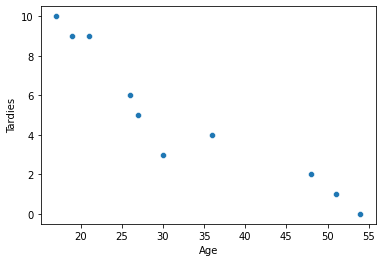

In [37]:
# Your code here.
sns.scatterplot(x = "Age", y= "Tardies", data = student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, the plot above shows that there is a negative correlation between age and tardiness. Thus, the main hypothesis is that:  
**THE YOUNGER STUDENTS ARE MORE LIKELY TO BE LATE TO CLASS**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
#To calculate the covariance
covariance = student_data[["Tardies", "Age"]].cov()
covariance

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [7]:
#to calculate the correlations. NOTE, I have used Pearson's correlation because we know that it is a linear correlation
    ##(we have seen it in the scatterplot) and also because it is the most commonly used. In the case of a correlation that 
    ##we see it is not linear we could use Spearman's correlation.

correlation = (student_data[["Tardies", "Age"]].corr(method = 'pearson'))
correlation

,Tardies,Age
Tardies,1.000000,-0.939163
Age,-0.939163,1.000000


Both terms measure the relationship and the dependency between two variables.However, **“Covariance”** indicates the direction of the linear relationship between variables. **“Correlation”** on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance.

CORRELATION VALUES ==> standardized   
COVARIANCE VALUES == > NOT standardized 

Therefore, from the covariance we can obtain the direction of the relationship between the two variables in the example, in this case negative (i.e. as one increases, the other decreases). On the other hand, from the correlation we can also obtain the strength of the relationship between the two variables. This value will oscillate between -1 and 1. 
the closer to 1 or -1 the greater correlation. In our case we have a correlation of -0.939 which indicates a great correlation between these two variables

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here.
lr = LinearRegression()

In [15]:
# To create a linear regression where the predictor variable is 'Age'.
lr.fit( X = student_data.Tardies.to_frame(), 
        y = student_data.Age)


beta_1 = lr.coef_[0] #To extract from the regression the slope of our model
beta_0 = lr.intercept_ #To obtain the intercept of our linear regression

In [23]:
beta_1, beta_0

(-3.632418069087687, 50.69884853852967)

Plot your regression model on your scatter plot.

Text(0.5, 0, 'Age')

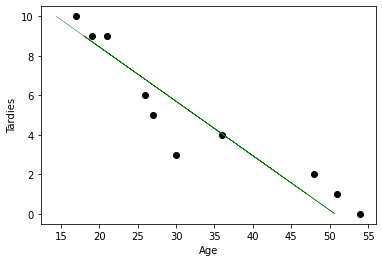

In [41]:
# Your code here.
pred = beta_0 + beta_1 * student_data.Tardies #Predicted values for our regression. X = the Tardies columns of the dataframe

plt.scatter(student_data.Age,student_data.Tardies, color = 'black')
plt.plot(pred, student_data.Tardies,lw = 0.5, color = 'green')
plt.ylabel("Tardies")
plt.xlabel("Age")

In [36]:
#Summary of our results:

results = smf.ols('Tardies ~ Age', data=student_data).fit()
results.summary()

/home/anagarcia/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           5.57e-05
Time:                        16:53:35   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**1. Regression type** ==> linear regression

**2. What will be your outcome variable?** NO ENTIENDO ESTA PREGUNTAAAAAA

**3. What can conclusions can you draw from your model and how confident in these conclusions are you?**  
  - Intercept: 12.8888 ==> The intercept (often labeled the constant) is the expected mean value of Y when all X=0. The literal explanation would be if age is zero, the expected mean tardies is 12.88 
  
  - Age coefficient: -0.2428 ==> For each unit that increased in years decreases -0.24 being late  
  
  - R-squared: 0.882 ==> This means that 88.2% of the variation of our data is explained by the variable Age 
  
  - *p-value* : 0.00 ==> Being less than 0.05 this variable is significant and therefore it can be ruled out that the observed pattern may be due to chance

**4. Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.**


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
# Your response here. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 